In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Read in data
TRAIN_DIR = "drive/MyDrive/STAT480-Group Project/dataset/track2"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

column  = ['Click', 'Impression', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QID', 'KeyId', 'TitleID', 'DescID', 'UID']
train = pd.read_csv(TRAIN_DIR + "/training.txt", sep='\t', header=None, nrows=5000000, names=column)

train.head(10)

,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,QID,KeyId,TitleID,DescID,UID
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234
5,0,1,10196385171799537224,21375650,36832,2,1,4688625,202465,457316,429545,490234
6,0,1,4203081172173603803,4427028,28647,3,1,4532751,720719,3402221,2663964,490234
7,0,1,4203081172173603803,4428493,28647,2,2,13171922,1493,11658,5668,490234
8,0,1,585474943700910275,20945590,35083,2,1,35143,28111,151695,128782,490234
9,0,1,9684554778607002606,21406020,36943,2,2,4688625,202465,1172072,973354,490234


In [ ]:
query_col = ['QID', 'Query']
query     = pd.read_csv(TRAIN_DIR + '/queryid_tokensid.txt', sep='\t', header=None, names=query_col)

user_col  = ['UID', 'Gender', 'Age']
user      = pd.read_csv(TRAIN_DIR + '/userid_profile.txt', sep='\t', header=None, names=user_col)

desc_col  = ['DescID', 'Description']
desc      = pd.read_csv(TRAIN_DIR + '/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)

title_col = ['TitleID', 'Title']
title     = pd.read_csv(TRAIN_DIR + '/titleid_tokensid.txt', sep='\t', header=None, names=title_col)

In [ ]:
query.head(5)

,QID,Query
0,0,12731
1,1,1545|75|31
2,2,383
3,3,518|1996
4,4,4189|75|31


In [ ]:
user.head(5)

,UID,Gender,Age
0,1,1,5
1,2,2,3
2,3,1,5
3,4,1,3
4,5,2,1


In [ ]:
desc.head(5)

,DescID,Description
0,0,1545|31|40|615|1|272|18889|1|220|511|20|5270|1...
1,1,172|46|467|170|5634|5112|40|155|1965|834|21|41...
2,2,2672|6|1159|109662|123|49933|160|848|248|207|1...
3,3,13280|35|1299|26|282|477|606|1|4016|1671|771|1...
4,4,13327|99|128|494|2928|21|26500|10|11733|10|318...


In [ ]:
title.head(5)

,TitleID,Title
0,0,615|1545|75|31|1|138|1270|615|131
1,1,466|582|685|1|42|45|477|314
2,2,12731|190|513|12731|677|183
3,3,2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4,4,165|134|460|2887|50|2|17527|1|1540|592|2181|3|...


In [ ]:
def count(sentence):
    return len(str(sentence).split('|'))

In [ ]:
query['QCount'] = query['Query'].apply(count)
title['TCount'] = title['Title'].apply(count)
desc['DCount'] = desc['Description'].apply(count)

del title['Title']
del desc['Description']
del query['Query']

In [ ]:
new_df = pd.merge(train, user,  on='UID')
new_df = pd.merge(new_df,    query, on='QID')
new_df = pd.merge(new_df,    title, on='TitleID')
new_df = pd.merge(new_df,    desc,  on='DescID')
new_df['CTR'] = new_df['Click'] * 1.0 / new_df['Impression'] * 100

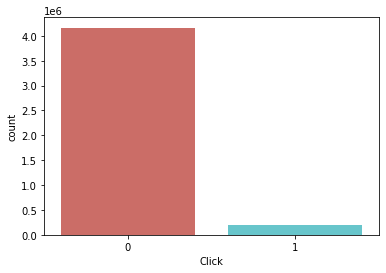

0    95.348692
1     4.651308
Name: Click, dtype: float64


In [ ]:
#filter clicks to clicks or non-clicks
filter_click = [0, 1]
click_df = new_df[(new_df['Click'].isin(filter_click)) & (new_df["Impression"] == 1)]

sns.countplot(x='Click',data=click_df, palette='hls')
plt.show();

print(click_df['Click'].value_counts()/len(click_df) * 100)

We see that given an impression, the likelihood of a user clicking the ad is 

*   List item
*   List item

around 4.65%.

In [ ]:
imp_click = new_df[['AdId', 'Impression', 'Click']].copy()
result1 = imp_click.groupby('AdId').agg(['mean'])
result1.head(10)

,Impression,Click
,mean,mean
AdId,,
1000031,1.000000,0.000000
1000467,2.315789,0.105263
1000468,1.000000,0.000000
1000469,1.000000,0.000000
1000471,1.000000,0.000000
1000473,2.000000,0.000000
1000474,1.000000,0.000000
1000475,1.000000,0.000000


Text(0, 0.5, 'No. of Clicks')

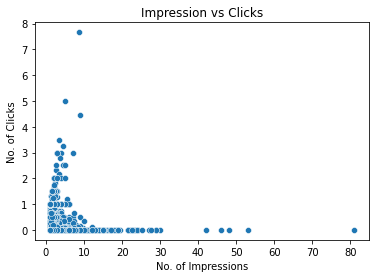

In [ ]:
x = result1[('Impression', 'mean')]
y = result1[('Click', 'mean')]
p = sns.scatterplot(x = x,
            y = y)
p.set_title("Impression vs Clicks")
p.set_xlabel("No. of Impressions")
p.set_ylabel("No. of Clicks")


As an user's impression on an advertisement increases, clicks are still mostly 0, showing users are less likely to click on an ad, the more they see it.

In [ ]:
ctr_pos = new_df[['Pos', 'CTR']].copy()
result2 = ctr_pos.groupby('Pos').agg(['mean', 'count']).reset_index()
result2["CTR", "mean"]

0    5.518009
1    3.077325
2    1.894403
Name: (CTR, mean), dtype: float64

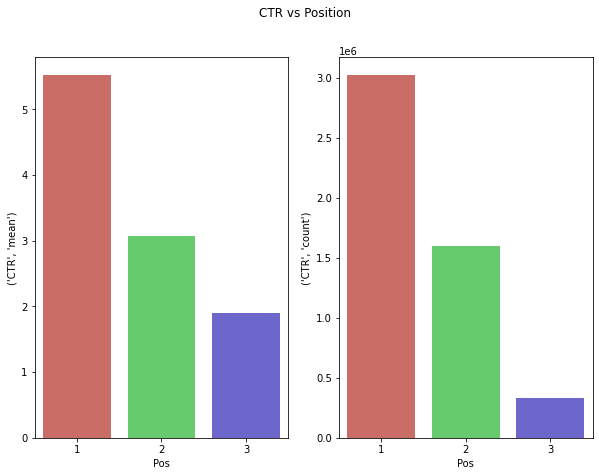

In [ ]:
dims = (10, 7)
f, axes = plt.subplots(1, 2, figsize=dims)
f.suptitle('CTR vs Position')
sns.barplot(x = "Pos", y= result2["CTR", "mean"], data=result2, ax = axes[0], palette = 'hls')
sns.barplot(x = "Pos", y= result2["CTR", "count"], data=result2, ax = axes[1], palette = 'hls')
plt.show()

Position 1, which is the advertisement with the lowest position, has a higher CTR than an advertisement at position 3, since advertisements with a lower position is more visible to the user, and leads to a higher probability of getting clicked.


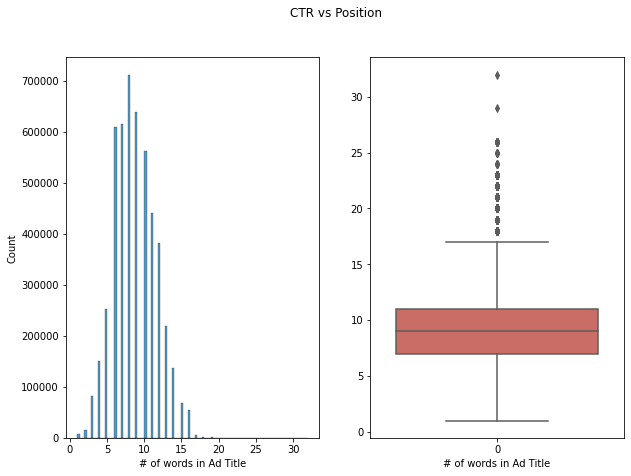

Median No. of words in a Ad title: 9.0
3rd Quantile No. of words in a Ad title: 11.0


In [ ]:
num_ads = new_df[['TCount']].copy()

f, axes1 = plt.subplots(1, 2, figsize=dims)
f.suptitle('CTR vs Position')

sns.histplot(data = num_ads['TCount'], bins = 100, ax = axes1[0]).set(
    xlabel='# of words in Ad Title')
sns.boxplot(data = num_ads["TCount"], palette = 'hls', ax = axes1[1]).set(
    xlabel='# of words in Ad Title')
plt.show()

print( 'Median No. of words in an Ad title:', num_ads['TCount'].quantile(0.5))
print( '3rd Quantile No. of words in an Ad title:', num_ads['TCount'].quantile(0.75))

We see that the median number of words in an ad title is around 9, and the 3rd quantile of number of words in an ad title is 11, meaning that 75% of the ads in the dataset use less than 11 words in their ad titles.
